# Test 01: Performing Multiple Sequence Alignment

### Overview

This notebook demonstrates alignment of a set of 6 sequences from a BAliBASE testcase using MAli v1.31.

The resulting alignment is then scored against a structural reference as this is a helpful way of showing that the output is valid.

Expected runtime: ~30 seconds or less

### Context

This notebook is intended to test the following requirements of MAli:

**Requirement 1.1** - Given sequences to align, produces a valid solution - independent of quality.
- An alignment is performed, with the output shown below and scored against a reference using QScore. Invalid alignments would receive a score of 0.0 or yield no score at all.

**Requirement 1.2** - Employs a heuristic to estimate a number of iterations needed to align each set of sequences.
- MAli is invoked without specifying how many seconds or iterations to spend on alignment. MAli generally spends ~5 seconds on alignment by default.

**Requirement 1.3** - Aligns sets of 6 typical protein sequences within 10 seconds on a university machine.
- Every testcase in /data contains 6 biological sequences. As such, this notebook demonstrates alignment of a 6-sequence testcase within 10 seconds.

**Requirement 2.1** - Employs a metaheuristic algorithm (such as Genetic Algorithm) to guide the alignment process.
- MAli v1.31 uses a mew + lambda evolutionary algorithm to perform multiple sequence alignment, as demonstrated below.

**Requirement 3.1** - Can load a set of biological sequences from an appropriate bioinformatics file format.
- The input testcases for this demo are in the FASTA file format.

**Requirement 3.2** - Can output aligned sets of sequences using an appropriate bioinformatics file format.
- The output alignments for this demo are in the FASTA file format.

### Installing Prerequisites

In [1]:
!pip install biopython

#### Imports

In [2]:
import os
import shutil
import subprocess
import time
from presentation_helper import PresentationHelper
from wrapped_scorer import WrappedScorer

#### MAli v1.31

In [3]:
ALIGNER_NAME = "MAli-v1.31"
ALIGNER_PATH = "MAli-v1.31/MAli.exe"
OUTPUT_FOLDER = "data/output"

In [4]:
# creating empty output folder
if os.path.exists(OUTPUT_FOLDER):
    shutil.rmtree(OUTPUT_FOLDER)
os.makedirs(OUTPUT_FOLDER)

#### Testcase

The BB20016 testcase from BAliBASE has been chosen as it contains 6 biological sequences and has a structural reference available.

All testcases from BALIS-2 (subset of BAliBASE used for development) containing 6 sequences have been included in /data

In [5]:
TESTCASE_NAME = "BB20016"
INPUT_FILEPATH = f"data/input/{TESTCASE_NAME}"
OUTPUT_FILEPATH = f"data/output/{TESTCASE_NAME}"

#### Viewing Testcase

In [6]:
presenter = PresentationHelper()

In [7]:
presenter.present_unaligned_fasta(INPUT_FILEPATH)

Displaying Sequences from data/input/BB20016: 

>1a7x_A
GVQVETISPGDGRTFPKRGQTCVVHYTGMLEDGKKFDSSRDRNKPFKFMLGKQEVIRGWEEGVAQMSVGQRAKLTISPDYAYGATGHPGIIPPHATLVFDVELLKLE

>1jvw_A
AASHEERMNNYRKRVGRLFMEQKAAQPDAVKLPSGLVFQRIARGSGKRAPAIDDKCEVHYTGRLRDGTVFDSSRERGKPTTFRPNEVIKGWTEALQLMREGDRWRLFIPYDLAYGVTGGGGMIPPYSPLEFDVELISIKDGGKGRTAEEVDEILRKAEED

>1kt0_A
VLKIVTPMIGDKVYVHYKGKLFDSPFVFSLGKGQVIKAWDIGVATMKRGEICHLLCKPEYAYGSAGSLPKIPSNATLFFEIELLDFKGEDLFEDGGIIRRTKRKGEGYSNPNEGATVEIHLEGRCGGRMFDCRDVAFTVGEGEDHDIPIGIDKALEKMQREEQCILYLGPRYGFGEAGKPKFGIEPNAELIYEVTLKSFEKAKESWEMDTKEKLEQAAIVKEKGTVYFKGGKYMQAVIQYGKIVSWLEMEYGLSEKESKASESFLLAAFLNLAMCYLKLREYTKAVECCDKALGLDSANEKGLYRRGEAQLLMNEFESAKGDFEKVLEVNAARLQISMCQKKAKEHNERDRRIYANM

>1pbk_
PKYTKSVLKKGDKTNFPKKGDVVHCWYTGTLQDGTVFDTNIQTSAKKKKNAKPLSFKVGVGKVIRGWDEALLTMSKGEKARLEIEPEWAYGKKGQPDAKIPPNAKLTFEVELVDID

>1r9h_A
KIDITPKKDGGVLKLIKKEGQGVVKPTTGTTVKVHYVGTLENGTKFDSSRDRGDQFSFNLGRGNVIKGWDLGVATMTKGEVAEFTIRSDYGYGDAGSPPKIPGGATLIFEVELFEWSA

>1l1p_A
GSHMQATWKEKDGAVEAEDRVTIDFTGSVDGEEFEGG

#### Performing Alignment

In [8]:
ALIGNMENT_COMMAND = f"{ALIGNER_PATH} -input {INPUT_FILEPATH} -output {OUTPUT_FILEPATH}"
print(f"CLI command to be run: '{ALIGNMENT_COMMAND}'")

CLI command to be run: 'MAli-v1.31/MAli.exe -input data/input/BB20016 -output data/output/BB20016'


In [9]:
start_time = time.perf_counter()
subprocess.run(ALIGNMENT_COMMAND)
end_time = time.perf_counter()

time_in_milliseconds = (end_time - start_time) * 1000
time_in_milliseconds_rounded = round(time_in_milliseconds, 0)
time_in_seconds = time_in_milliseconds_rounded / 1000

print(f"Performed alignment of {TESTCASE_NAME} in {time_in_seconds} seconds")

Performed alignment of BB20016 in 5.158 seconds


#### Viewing Alignment Produced by MAli

In [10]:
ALIGNMENT_FILEPATH = OUTPUT_FILEPATH + ".faa"
presenter.present_interleaved_aligned_fasta(ALIGNMENT_FILEPATH)

Displaying interleaved alignment from 'data/output/BB20016.faa: 

1a7x_A          ------------------------------------------------------------
1jvw_A          ------------------------------------------------------------
1kt0_A          VLKIVTPMIGDKVYVHYKGKLFDSPFVFSLGKGQVIKAWDIGVATMKRGEICHLLCKPEY
1pbk_           ------------------------------------------------------------
1r9h_A          ------------------------------------------------------------
1l1p_A          ------------------------------------------------------------

1a7x_A          ------------------------------------------------------------
1jvw_A          ------------------------------------------------------------
1kt0_A          AYGSAGSLPKIPSNATLFFEIELLDFKGEDLFEDGGIIRRTKRKGEGYSNPNEGATVEIH
1pbk_           ------------------------------------------------------------
1r9h_A          ------------------------------------------------------------
1l1p_A          ------------------------------------------------------------

1a7x_A  

#### Viewing Structural Reference Alignment

In [11]:
REFERENCE_FILEPATH = f"data/ref/{TESTCASE_NAME}"
presenter.present_interleaved_aligned_fasta(REFERENCE_FILEPATH)

Displaying interleaved alignment from 'data/ref/BB20016: 

1a7x_A          ............................................................
1jvw_A          ............................................................
1kt0_A          vlkivtpmigdkvyvhykgklfdspfvfslgkgqvikawdigvatmkrgeichllckpey
1pbk_           ............................................................
1r9h_A          ............................................................
1l1p_A          ............................................................

1a7x_A          ...................................gvQVETISPGdgrtFPKRGQTCVVH
1jvw_A          .aasheermnnyrkrvgrlfmeqkaaqpdavklpsglVFQRIARGsgkrAPAIDDKCEVH
1kt0_A          aygsagslpkipsnatlffeielldfkgedlfedggiIRRTKRKGegysNPNEGATVEIH
1pbk_           ..................................pkyTKSVLKKGdktnFPKKGDVVHCW
1r9h_A          .........................kiditpkkdggvLKLIKKEGqgvvKPTTGTTVKVH
1l1p_A          ...................................gsHMQATWKEkd.gAVEAEDRVTID

1a7x_A         

#### Scoring Alignment Against Reference

In [12]:
SCORER_PATH = "QScore/qscore.exe"
scorer = WrappedScorer(SCORER_PATH)

score = scorer.score_testcase(ALIGNMENT_FILEPATH, REFERENCE_FILEPATH)
print(score)

0.459


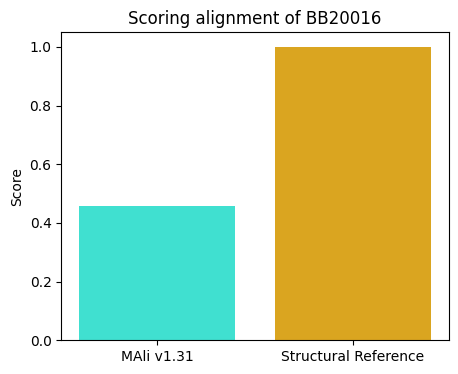

In [13]:
presenter.present_score(TESTCASE_NAME, score)